<a href="https://colab.research.google.com/github/ArshadAhamed123/Movie-Recommendation-System/blob/main/Movie_Recommendation_Sys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import numpy as np

In [64]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [65]:
movies.sample(3)

,movieId,title,genres
4862,7265,"Dreamers, The (2003)",Drama
1470,1995,Poltergeist II: The Other Side (1986),Horror|Thriller
2175,2891,"Happy, Texas (1999)",Comedy


In [66]:
ratings.sample(3)

,userId,movieId,rating,timestamp
34682,232,64839,3.5,1234142304
60786,391,5475,4.0,1030824894
4298,28,1271,2.0,1234334960


In [67]:
final_dataset = ratings.pivot(index = 'userId', columns = 'movieId', values = 'rating')
final_dataset.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
final_dataset.fillna(0, inplace= True)
final_dataset.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
no_users_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

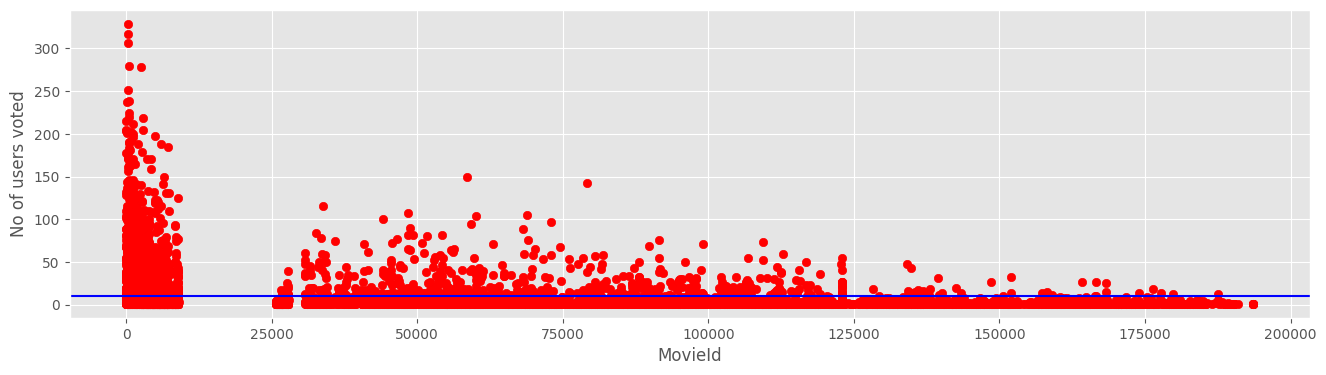

In [70]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig,axes = plt.subplots(1,1, figsize =(16,4))
plt.scatter(no_users_voted.index, no_users_voted, color = 'red' )
plt.axhline(y = 10, color = 'blue')
plt.xlabel('MovieId')
plt.ylabel('No of users voted')
plt.show()

In [71]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(final_dataset.T)
cosine_sim_df = pd.DataFrame(cosine_sim, index=final_dataset.columns, columns=final_dataset.columns)


In [72]:
def recommend_movies(movie_id, top_n=10):

    sim_scores = cosine_sim_df[movie_id]

    sorted_similar_movies = sim_scores.sort_values(ascending=False)

    similar_movie_ids = sorted_similar_movies.index[1:top_n+1]

    recommended_movies = movies[movies['movieId'].isin(similar_movie_ids)]
    return recommended_movies['title'].tolist()



In [73]:
available_movie_ids = final_dataset.columns
available_movies = movies[movies['movieId'].isin(available_movie_ids)]

print(available_movies['title'].head(10))


0                      Toy Story (1995)
1                        Jumanji (1995)
2               Grumpier Old Men (1995)
3              Waiting to Exhale (1995)
4    Father of the Bride Part II (1995)
5                           Heat (1995)
6                        Sabrina (1995)
7                   Tom and Huck (1995)
8                   Sudden Death (1995)
9                      GoldenEye (1995)
Name: title, dtype: object


In [75]:
#!pip install gradio

import gradio as gr

def recommend_by_title_collaborative(title):
    match = movies[movies['title'] == title]
    if match.empty:
        return "Movie title not found."
    movie_id = match['movieId'].values[0]

    recommended_titles = recommend_movies(movie_id)

    return '\n'.join(recommended_titles)

available_movie_ids = final_dataset.columns
available_movies = movies[movies['movieId'].isin(available_movie_ids)]
movie_titles = sorted(available_movies['title'].tolist())

gr.Interface(
    fn=recommend_by_title_collaborative,
    inputs=gr.Dropdown(choices=movie_titles, label="Select a Movie"),
    outputs="text",
    title="Collaborative Movie Recommender",
    description="Pick a movie to get similar recommendations based on user ratings"
).launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://44ae867bc4d02ef0e6.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
